In [6]:
#plant disease from kaggle
#kaggle api dwnld

In [7]:
#upload  json file here
#initialise all random func to 0
import random
import numpy as np
import tensorflow as tf
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [8]:
import os
import json
from zipfile import ZipFile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models

In [9]:
#setup kaggle api to colab
pr=json.load(open("kaggle.json"))

In [10]:
os.environ["KAGGLE_USERNAME"]=pr["username"]
os.environ["KAGGLE_KEY"]=pr["key"]

In [11]:
#abv data is for setting an environment kaggle to colab
import kaggle

In [12]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [01:32<00:00, 24.7MB/s]
100% 2.04G/2.04G [01:32<00:00, 23.7MB/s]


In [13]:
ls

kaggle.json  plantvillage-dataset.zip  sample_data/


In [14]:
f1=ZipFile("plantvillage-dataset.zip")
f1.extractall()
f1.close()

In [15]:
ls

 kaggle.json  'plantvillage dataset'/   plantvillage-dataset.zip   sample_data/


In [16]:
base_dir="plantvillage dataset/color"

In [17]:
#Setting the base directory to color folder
ipath="/content/plantvillage dataset/color/Apple___Apple_scab/0208f4eb-45a4-4399-904e-989ac2c6257c___FREC_Scab 3037.JPG"

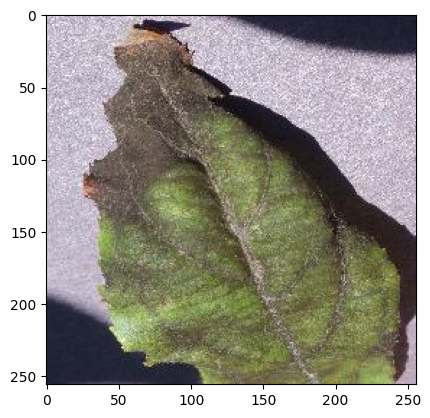

In [18]:
img=mpimg.imread(ipath)
plt.imshow(img)

(-0.5, 255.5, 255.5, -0.5)

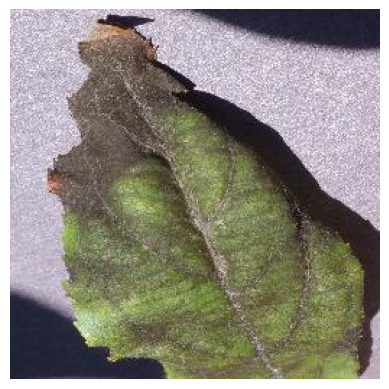

In [19]:
img=mpimg.imread(ipath)
plt.imshow(img)
plt.axis("off")

In [20]:
img.shape

(256, 256, 3)

In [46]:
#make all the images uniform
img_size=224
batch_size=32
data_gen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [47]:
#validation split is testing size
train_generator=data_gen.flow_from_directory(base_dir,target_size=(img_size,img_size),batch_size=batch_size,class_mode="categorical",subset="training")

Found 43456 images belonging to 38 classes.


In [48]:
#validation split is testing size
validation_generator=data_gen.flow_from_directory(base_dir,target_size=(img_size,img_size),batch_size=batch_size,class_mode="categorical",subset="validation")

Found 10849 images belonging to 38 classes.


In [49]:
#Making of neural network
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3),activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(train_generator.num_classes,activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 380192)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      97,329,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 97,349,318 (371.36 MB)

 Trainable params: 97,349,318 (371.36 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
np.array([[1,2,3]]).flatten()

array([1, 2, 3])

In [52]:
#Pass the data to my network
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [53]:
model.fit(train_generator,steps_per_epoch=train_generator.samples//batch_size,
          epochs=5,
          validation_data=validation_generator,validation_steps=validation_generator.samples//batch_size)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 99s 71ms/step - accuracy: 0.6037 - loss: 1.7842 - val_accuracy: 0.8148 - val_loss: 0.5851
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 95s 70ms/step - accuracy: 0.9213 - loss: 0.2601 - val_accuracy: 0.8119 - val_loss: 0.6300
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 142s 70ms/step - accuracy: 0.9696 - loss: 0.0972 - val_accuracy: 0.8178 - val_loss: 0.7471
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 94s 69ms/step - accuracy: 0.9786 - loss: 0.0650 - val_accuracy: 0.8470 - val_loss: 0.8068
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 143s 105ms/step - accuracy: 0.9840 - loss: 0.0545 - val_accuracy: 0.8308 - val_loss: 0.8235


In [54]:
model.save("pr.h5")

In [55]:
#above line is for saving the model
#extract the classes frm data with indices
train_generator.class_indices.items()

dict_items([('Apple___Apple_scab', 0), ('Apple___Black_rot', 1), ('Apple___Cedar_apple_rust', 2), ('Apple___healthy', 3), ('Blueberry___healthy', 4), ('Cherry_(including_sour)___Powdery_mildew', 5), ('Cherry_(including_sour)___healthy', 6), ('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 7), ('Corn_(maize)___Common_rust_', 8), ('Corn_(maize)___Northern_Leaf_Blight', 9), ('Corn_(maize)___healthy', 10), ('Grape___Black_rot', 11), ('Grape___Esca_(Black_Measles)', 12), ('Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 13), ('Grape___healthy', 14), ('Orange___Haunglongbing_(Citrus_greening)', 15), ('Peach___Bacterial_spot', 16), ('Peach___healthy', 17), ('Pepper,_bell___Bacterial_spot', 18), ('Pepper,_bell___healthy', 19), ('Potato___Early_blight', 20), ('Potato___Late_blight', 21), ('Potato___healthy', 22), ('Raspberry___healthy', 23), ('Soybean___healthy', 24), ('Squash___Powdery_mildew', 25), ('Strawberry___Leaf_scorch', 26), ('Strawberry___healthy', 27), ('Tomato___Bacterial_spot', 

In [56]:
#above line is for saving the model
#extract the classes frm data with indices
train_generator.class_indices.items()
#from list of tuples I want a make a dictionary
{v:k for k,v in train_generator.class_indices.items()}

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [57]:
#above line is for saving the model
#extract the classes frm data with indices
train_generator.class_indices.items()
#from list of tuples I want a make a dictionary
pr_classes={v:k for k,v in train_generator.class_indices.items()}

In [58]:
#Saving key as index and value as disease in abv cell
json.dump(pr_classes,open("pr_classes.json","w"))

In [59]:
ls

 kaggle.json              plantvillage-dataset.zip   pr.h5
'plantvillage dataset'/   pr_classes.json            sample_data/


In [69]:
def load_preprocess_image(ipath,target_size=(224,224)):
  img=Image.open(ipath)
  img=img.resize(target_size)
  img_array=np.array(img)
  img_array=np.expand_dims(img_array,axis=0)
  img_array=img_array.astype("float32")/255
  return img_array

In [70]:
#abv cell is for resizing of image
def predict_disease(model,ipath,class_indices):
  preprocess_img=load_preprocess_image(ipath)
  prediction=model.predict(preprocess_img)
  predicted_class_index=np.argmax(prediction,axis=1)[0]
  predicted_class=class_indices[predicted_class_index]
  return predicted_class
  #axis=1 is pulling the data from the column
  #0 is the top most class

In [71]:
#Get Image path
i1="/content/plantvillage dataset/color/Blueberry___healthy/02159532-6430-4006-a245-421593949304___RS_HL 2686.JPG"
i2="/content/plantvillage dataset/color/Grape___Black_rot/006efc68-9e46-4168-921c-10ef8065702c___FAM_B.Rot 3470.JPG"

In [72]:
#Apply the abv image to the model
predict_disease(model,i1,pr_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


'Blueberry___healthy'